**Importing the Libraries**

In [1]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, Conv1D, MaxPooling1D, Flatten
from keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

2024-04-21 14:43:47.084104: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-21 14:43:47.084258: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-21 14:43:47.245847: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


**Loading the Dataset**

In [2]:
train = [line.strip() for line in open("/kaggle/input/dl-dataset/DL Dataset/train.txt", "r").readlines()[1:]]
raw_x_train = [line.split("\t")[1] for line in train]
raw_y_train = [line.split("\t")[0] for line in train]

test = [line.strip() for line in open("/kaggle/input/dl-dataset/DL Dataset/test.txt", "r").readlines()]
raw_x_test = [line.split("\t")[1] for line in test]
raw_y_test = [line.split("\t")[0] for line in test]

val=[line.strip() for line in open("/kaggle/input/dl-dataset/DL Dataset/val.txt", "r").readlines()]
raw_x_val=[line.split("\t")[1] for line in val]
raw_y_val=[line.split("\t")[0] for line in val]


**Tokenizing the Dataset**

In [3]:
tokenizer = Tokenizer(lower=True, char_level=True, oov_token='-n-')
tokenizer.fit_on_texts(raw_x_train + raw_x_val + raw_x_test)
char_index = tokenizer.word_index
sequence_length=200
x_train = pad_sequences(tokenizer.texts_to_sequences(raw_x_train), maxlen=sequence_length)
x_val = pad_sequences(tokenizer.texts_to_sequences(raw_x_val), maxlen=sequence_length)
x_test = pad_sequences(tokenizer.texts_to_sequences(raw_x_test), maxlen=sequence_length)

encoder = LabelEncoder()

y_train = encoder.fit_transform(raw_y_train)
y_val = encoder.transform(raw_y_val)
y_test = encoder.transform(raw_y_test)

**Parameters**

In [4]:
params = {'loss_function': 'binary_crossentropy',
                       'optimizer': 'adam',
                       'sequence_length': 200,
                       'batch_train': 5000,
                       'batch_test': 5000,
                       'categories': ['phishing', 'legitimate'],
                       'char_index': None,
                       'epoch': 30,
                       'embedding_dimension': 50,
                       'dataset_dir': "../dataset/small_dataset/"}

**Model Definition**

In [5]:
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense
model = Sequential()
voc_size = len(char_index.keys())
print("voc_size: {}".format(voc_size))
model.add(Embedding(voc_size + 1, 50))

model.add(Conv1D(128, 3, activation='tanh'))
model.add(MaxPooling1D(3))
model.add(Dropout(0.2))

model.add(Conv1D(128, 7, activation='tanh', padding='same'))
model.add(Dropout(0.2))

model.add(Conv1D(128, 5, activation='tanh', padding='same'))
model.add(Dropout(0.2))

model.add(Conv1D(128, 3, activation='tanh', padding='same'))
model.add(MaxPooling1D(3))
model.add(Dropout(0.2))

model.add(Conv1D(128, 5, activation='tanh', padding='same'))
model.add(Dropout(0.2))

model.add(Conv1D(128, 3, activation='tanh', padding='same'))
model.add(MaxPooling1D(3))
model.add(Dropout(0.2))

model.add(Conv1D(128, 3, activation='tanh', padding='same'))
model.add(MaxPooling1D(3))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(len(params['categories'])-1, activation='sigmoid'))



voc_size: 71


**Training**

In [6]:
model.compile(loss=params['loss_function'], optimizer=params['optimizer'], metrics=['accuracy'])


hist = model.fit(x_train, y_train,
                batch_size=params['batch_train'],
                epochs=params['epoch'],
                shuffle=True,
                validation_data=(x_val, y_val)
                )


Epoch 1/30


I0000 00:00:1713710834.931505      75 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


210/210 ━━━━━━━━━━━━━━━━━━━━ 165s 486ms/step - accuracy: 0.7836 - loss: 0.4078 - val_accuracy: 0.9470 - val_loss: 0.1320
Epoch 2/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 81s 384ms/step - accuracy: 0.9445 - loss: 0.1399 - val_accuracy: 0.9589 - val_loss: 0.1068
Epoch 3/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 82s 384ms/step - accuracy: 0.9548 - loss: 0.1138 - val_accuracy: 0.9634 - val_loss: 0.0951
Epoch 4/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 81s 384ms/step - accuracy: 0.9606 - loss: 0.0991 - val_accuracy: 0.9622 - val_loss: 0.0986
Epoch 5/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 81s 384ms/step - accuracy: 0.9625 - loss: 0.0949 - val_accuracy: 0.9702 - val_loss: 0.0769
Epoch 6/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 81s 384ms/step - accuracy: 0.9656 - loss: 0.0876 - val_accuracy: 0.9654 - val_loss: 0.0901
Epoch 7/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 81s 384ms/step - accuracy: 0.9670 - loss: 0.0841 - val_accuracy: 0.9729 - val_loss: 0.0697
Epoch 8/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 81s 384ms/step - accuracy: 0.9683 - loss: 0.0802 - va

**Summary**

In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 200, 50)        │         3,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 198, 128)       │        19,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 66, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 66, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 66, 128)        │       114,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 66, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 66, 128)        │        82,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 66, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 66, 128)        │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 22, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 22, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 22, 128)        │        82,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 22, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 22, 128)        │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 7, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 7, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_6 (Conv1D)               │ (None, 7, 128)         │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 2, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 2, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,349,813 (5.15 MB)

 Trainable params: 449,937 (1.72 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 899,876 (3.43 MB)

**Prediction**

In [8]:
y_pred = model.predict(x_test, batch_size=1000)
print(y_pred)



365/365 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step
[[4.2069671e-04]
 [9.9975711e-01]
 [9.9898130e-01]
 ...
 [3.8544319e-04]
 [9.9557447e-01]
 [9.9504691e-01]]


**Prediction**

In [9]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

# Convert predicted probabilities to binary labels
y_pred_binary = (np.array(y_pred) > 0.5).astype(int)
y_test=y_test.reshape(-1,1)

# Calculate classification report
report = classification_report(y_test, y_pred_binary)
print('Classification Report:')
print(report)

# Calculate confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred_binary)
print('Confusion Matrix:', confusion_mat)
print('Accuracy:',accuracy_score(y_test,y_pred_binary))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98    201736
           1       0.99      0.97      0.98    162463

    accuracy                           0.98    364199
   macro avg       0.98      0.98      0.98    364199
weighted avg       0.98      0.98      0.98    364199

Confusion Matrix: [[199597   2139]
 [  4224 158239]]
Accuracy: 0.9825287823415221


**Confusion Matrix **

<Axes: >

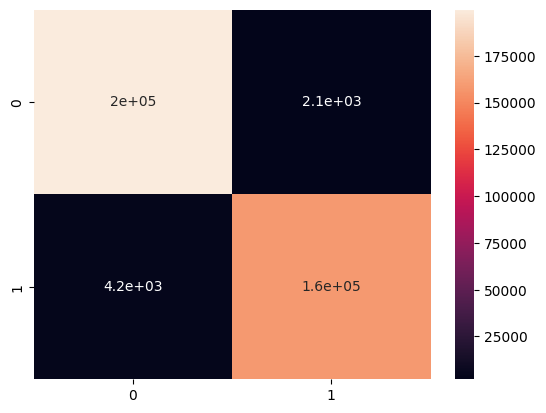

In [10]:
import seaborn as sns
sns.heatmap(confusion_mat,annot=True)